In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Ingestion

In [ ]:
raw_df = pd.read_csv("train.csv", encoding="latin-1")

raw_df.head()

,textID,text,selected_text,sentiment,time_of_tweet,age_of_user,country,population_2020,land_area,density
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


# Data Preprocessing

## Remove Missing Values

In [ ]:
print ("Rows     : " ,raw_df.shape[0])
print ("Columns  : " ,raw_df.shape[1])
print ("\nFeatures : \n" ,raw_df.columns.tolist())
print ("\nUnique values :  \n",raw_df.nunique())
print ("\nMissing values :  ", raw_df.isnull().sum().values.sum())

Rows     :  27481
Columns  :  10

Features : 
 ['textID', 'text', 'selected_text', 'sentiment', 'time_of_tweet', 'age_of_user', 'country', 'population_2020', 'land_area', 'density']

Unique values :  
 textID             27481
text               27480
selected_text      22430
sentiment              3
time_of_tweet          3
age_of_user            6
country              195
population_2020      195
land_area            193
density              136
dtype: int64

Missing values :   2


In [ ]:
raw_df = raw_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
raw_df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0
time_of_tweet,0
age_of_user,0
country,0
population_2020,0
land_area,0
density,0


## Drop Unnecessary Columns

In [ ]:
transformed_df = raw_df.drop(["textID", "selected_text"], axis = 1)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             27481 non-null  object 
 1   sentiment        27481 non-null  object 
 2   time_of_tweet    27481 non-null  object 
 3   age_of_user      27481 non-null  object 
 4   country          27481 non-null  object 
 5   population_2020  27481 non-null  int64  
 6   land_area        27481 non-null  float64
 7   density          27481 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


## Encode Categorical Features

In [ ]:
transformed_df = pd.get_dummies(
    transformed_df,
    sparse = True,
    columns = ["time_of_tweet", "age_of_user", "country"]
)

transformed_df.head()

,text,sentiment,population_2020,land_area,density,time_of_tweet_morning,time_of_tweet_night,time_of_tweet_noon,age_of_user_0-20,age_of_user_21-30,...,country_United Kingdom,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,"I`d have responded, if I were going",neutral,38928346,652860.0,60,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,Sooo SAD I will miss you here in San Diego!!!,negative,2877797,27400.0,105,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,my boss is bullying me...,negative,43851044,2381740.0,18,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,what interview! leave me alone,negative,77265,470.0,164,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Sons of ****, why couldn`t they put them on t...",negative,32866272,1246700.0,26,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
label_encoder = LabelEncoder()
transformed_df["sentiment"] = label_encoder.fit_transform(
    transformed_df["sentiment"]
)

transformed_df["sentiment"].head()

,sentiment
0,1
1,0
2,0
3,0
4,0


## Normalize Numerical Features

In [ ]:
min_max_scaler = MinMaxScaler()

transformed_df["population_2020"] = min_max_scaler.fit_transform(
    transformed_df[["population_2020"]]
)
transformed_df["land_area"] = min_max_scaler.fit_transform(
    transformed_df[["land_area"]]
)
transformed_df["density"] = min_max_scaler.fit_transform(
    transformed_df[["density"]]
)

transformed_df[["population_2020", "land_area", "density"]].head()

,population_2020,land_area,density
0,0.027046,0.039865,0.002202
1,0.001999,0.001673,0.003911
2,0.030466,0.145433,0.000608
3,0.000053,0.000029,0.006152
4,0.022834,0.076126,0.000911


## Text Preprocessing

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

transformed_df["text"] = transformed_df["text"].astype(str)
transformed_df["text"] = transformed_df["text"].apply(tweet_tokenizer.tokenize)

transformed_df["text"].head()

,text
0,"[I, `, d, have, responded, ,, if, I, were, going]"
1,"[Sooo, SAD, I, will, miss, you, here, in, San,..."
2,"[my, boss, is, bullying, me, ...]"
3,"[what, interview, !, leave, me, alone]"
4,"[Sons, of, *, *, *, ,, why, couldn, `, t, they..."


In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(encoded_text):
    s = stopwords.words("english")
    return [word for word in encoded_text if word not in s]

transformed_df["text"] = transformed_df["text"].apply(remove_stopwords)

transformed_df["text"].head()

,text
0,"[I, `, responded, ,, I, going]"
1,"[Sooo, SAD, I, miss, San, Diego, !, !, !]"
2,"[boss, bullying, ...]"
3,"[interview, !, leave, alone]"
4,"[Sons, *, *, *, ,, `, put, releases, already, ..."


In [ ]:
from nltk.stem import PorterStemmer

def stem_words(encoded_text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in encoded_text]

transformed_df["text"] = transformed_df["text"].apply(stem_words)
transformed_df["text"].head()

,text
0,"[i, `, respond, ,, i, go]"
1,"[sooo, sad, i, miss, san, diego, !, !, !]"
2,"[boss, bulli, ...]"
3,"[interview, !, leav, alon]"
4,"[son, *, *, *, ,, `, put, releas, alreadi, bou..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

transformed_df["text"] = transformed_df["text"].apply(lambda x: " ".join(x))

tfidf_vectorizer = TfidfVectorizer(
    max_features = 500
)
tfidf_matrix = tfidf_vectorizer.fit_transform(transformed_df["text"])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns = tfidf_vectorizer.get_feature_names_out()
)

transformed_df = pd.concat([transformed_df, tfidf_df], axis = 1) \
                    .drop("text", axis = 1)

transformed_df.head()

,sentiment,population_2020,land_area,density,time_of_tweet_morning,time_of_tweet_night,time_of_tweet_noon,age_of_user_0-20,age_of_user_21-30,age_of_user_31-45,...,yay,ye,yea,yeah,year,yesterday,yet,you,your,youtub
0,1,0.027046,0.039865,0.002202,True,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.001999,0.001673,0.003911,False,False,True,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.030466,0.145433,0.000608,False,True,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.000053,0.000029,0.006152,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.022834,0.076126,0.000911,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Split Test

In [ ]:
X = transformed_df.drop(columns=['sentiment'])
y = transformed_df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Logistic Regression w/o RFE

## Training Proper

In [ ]:
model_rg = LogisticRegression(max_iter=2000)
model_rg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(max_iter=2000)

In [ ]:
# make prediction
y_pred_rg = model_rg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Evaluation

In [ ]:
# compare predictions to the true labels
total_samples = len(y_test)
correct_predictions = (y_pred_rg == y_test)
num_correct = correct_predictions.sum()
num_wrong = total_samples - num_correct

print(f"Total samples:", total_samples)
print(f"Correct predictions:", num_correct)
print(f"Wrong predictions:", num_wrong)

Total samples: 5497
Correct predictions: 3702
Wrong predictions: 1795


In [ ]:
# Evaluate  accuracy
accuracy = accuracy_score(y_test, y_pred_rg)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_rg))

Accuracy: 0.6734582499545206
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.55      0.61      1556
           1       0.61      0.74      0.67      2224
           2       0.76      0.70      0.73      1717

    accuracy                           0.67      5497
   macro avg       0.69      0.66      0.67      5497
weighted avg       0.68      0.67      0.67      5497



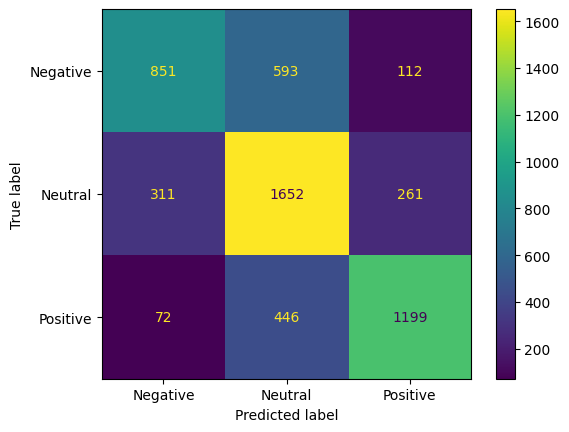

In [ ]:
model_class = "Negative", "Neutral", "Positive"
# 0 = negative
# 1 = neutral
# 2 = positive

cm = confusion_matrix(y_test, y_pred_rg)
ConfusionMatrixDisplay(cm, display_labels=model_class).plot()

# Logistic Regression w/ RFE

## Selecting top N significant features

In [ ]:
n_features_to_select = 200
rfe = RFE(estimator=model_rg, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=200)

In [ ]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['ah', 'all', 'amaz', 'and', 'anymor', 'around', 'away', 'awesom', 'aww',
       'awww',
       ...
       'world', 'worri', 'wow', 'wrong', 'www', 'ya', 'yay', 'ye', 'yea',
       'you'],
      dtype='object', length=200)


In [ ]:
# limited feature selection
selected_features_rfe = X_train.columns[rfe.support_]

In [ ]:
# filter data
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

## Training Proper

In [ ]:
model_rg_rfe = LogisticRegression(max_iter=2000)
model_rg_rfe.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# make prediction
y_pred_rfe = model_rg_rfe.predict(X_test_rfe)

## Evaluation

In [ ]:
# compare predictions to the true labels
total_samples = len(y_test)
correct_predictions = (y_pred_rfe == y_test)
num_correct = correct_predictions.sum()
num_wrong = total_samples - num_correct

print(f"Total samples:", total_samples)
print(f"Correct predictions:", num_correct)
print(f"Wrong predictions:", num_wrong)

Total samples: 5497
Correct predictions: 3744
Wrong predictions: 1753


In [ ]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_rfe))

Accuracy: 0.6810987811533564
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.53      0.62      1556
           1       0.61      0.77      0.68      2224
           2       0.77      0.70      0.73      1717

    accuracy                           0.68      5497
   macro avg       0.70      0.67      0.68      5497
weighted avg       0.69      0.68      0.68      5497



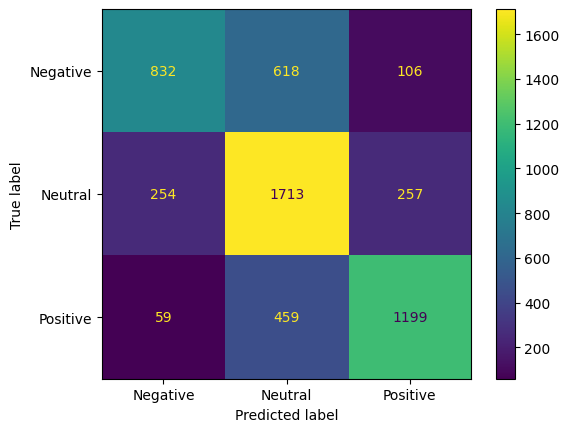

In [ ]:
model_class = "Negative", "Neutral", "Positive"
# 0 = negative
# 1 = neutral
# 2 = positive

cm = confusion_matrix(y_test, y_pred_rfe)
ConfusionMatrixDisplay(cm, display_labels=model_class).plot()

# Naive Bayes (using RFE train and test sets) with GridSearchCV

## Training Proper

In [ ]:
from sklearn.model_selection import GridSearchCV
nb_model_gs = MultinomialNB()

param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# find the best alpha value
grid_search_nb_rfe = GridSearchCV(nb_model_gs, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb_rfe.fit(X_train_rfe, y_train)

# best model with the best alpha
best_nb_model_rfe = grid_search_nb_rfe.best_estimator_

In [ ]:
# Best alpha
print("Best alpha for Naive Bayes:", grid_search_nb_rfe.best_params_)

Best alpha for Naive Bayes: {'alpha': 0.1}


In [ ]:
# make prediction
y_pred_nb_gs_rfe = grid_search_nb_rfe.predict(X_test_rfe)

## Evaluation

In [ ]:
# compare predictions to the true labels
total_samples = len(y_test)
correct_predictions = (y_pred_nb_gs_rfe == y_test)
num_correct = correct_predictions.sum()
num_wrong = total_samples - num_correct

print(f"Total samples:", total_samples)
print(f"Correct predictions:", num_correct)
print(f"Wrong predictions:", num_wrong)

Total samples: 5497
Correct predictions: 3534
Wrong predictions: 1963


In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb_gs_rfe)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_nb_gs_rfe))

Accuracy: 0.6428961251591777
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56      1556
           1       0.55      0.86      0.67      2224
           2       0.80      0.55      0.65      1717

    accuracy                           0.64      5497
   macro avg       0.72      0.61      0.63      5497
weighted avg       0.70      0.64      0.63      5497



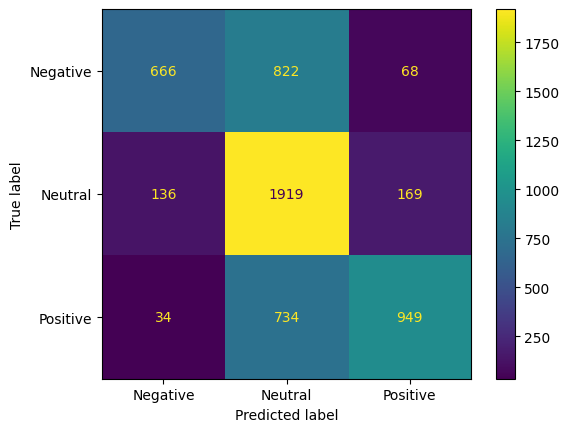

In [ ]:
model_class = "Negative", "Neutral", "Positive"
# 0 = negative
# 1 = neutral
# 2 = positive

cm = confusion_matrix(y_test, y_pred_nb_gs_rfe)
ConfusionMatrixDisplay(cm, display_labels=model_class).plot()

# Model Export

In [ ]:
from pickle import dump

with open("model.pkl", "wb") as f:
    dump(best_nb_model_rfe, f)

# Endpoint Prediction

In [ ]:
to_export = X_test_rfe.iloc[2]
to_export_json = to_export.to_json(orient='records')
to_export_json

'[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]'

```
{
  "instances": [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4085426766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4077831494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4701832793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450177203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
}
```